In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import sys
import nltk
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from string import punctuation
import json
import gensim
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score , accuracy_score
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import plotly.express as px  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import plotly.graph_objects as go 
from sklearn import metrics
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split

import graphviz 
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import roc_curve, auc


%matplotlib inline
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [18, 10]

#loading the data
train_dataset = pd.read_json("Kickstarter_2022-12-15T03_20_04_521Z.json", lines=True)
actual_data = [train_dataset["data"][k] for k in range(len(train_dataset))]

# Pre-processing

In [2]:
#creating the dataset
train_data = pd.DataFrame(actual_data)
train_data.head()

,id,photo,name,blurb,goal,pledged,state,slug,disable_communication,country,...,location,category,profile,spotlight,urls,source_url,friends,is_starred,is_backing,permissions
0,2014941593,{'key': 'assets/038/408/400/93382a88c9dbc1af95...,Driving School Stories of Celebrity Teens,Live camera installed inside an actual driving...,120000,26.0,failed,driving-school-stories-of-celebrity-teens,False,US,...,"{'id': 2363796, 'name': 'Beverly Hills', 'slug...","{'id': 292, 'name': 'Comedy', 'analytics_name'...","{'id': 4465571, 'project_id': 4465571, 'state'...",False,{'web': {'project': 'https://www.kickstarter.c...,https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN
1,1932477189,{'key': 'assets/039/331/847/6e37eed9904bea5a61...,Crime Squad 3D Blu-ray - REMASTER3D!,Crime Squad 3D in Superstereovision! Remastere...,2000,2541.0,live,crime-squad-3d-blu-ray,False,GB,...,"{'id': 19344, 'name': 'Edinburgh', 'slug': 'ed...","{'id': 292, 'name': 'Comedy', 'analytics_name'...","{'id': 4516474, 'project_id': 4516474, 'state'...",False,{'web': {'project': 'https://www.kickstarter.c...,https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN
2,1127603300,{'key': 'assets/039/363/407/a22ed33f3e39868214...,Help Us Get To Los Angeles!,"As winners of the 48-Hour Film Project, we hop...",16000,106.0,live,help-subharmonic-city-get-to-hollywood,False,US,...,"{'id': 2397816, 'name': 'El Paso', 'slug': 'el...","{'id': 292, 'name': 'Comedy', 'analytics_name'...","{'id': 4518603, 'project_id': 4518603, 'state'...",False,{'web': {'project': 'https://www.kickstarter.c...,https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN
3,640015337,{'key': 'assets/039/441/179/34d28696f4d6b0e43c...,SECRET,A Superhero Comedy,50000,501.0,live,secret-0,False,US,...,"{'id': 2416847, 'name': 'Hampton', 'slug': 'ha...","{'id': 292, 'name': 'Comedy', 'analytics_name'...","{'id': 4521089, 'project_id': 4521089, 'state'...",False,{'web': {'project': 'https://www.kickstarter.c...,https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN
4,233782977,{'key': 'assets/039/379/732/36d936f41c46751a38...,PINK (Short Film),A neurotic actress falls into crisis at her bi...,2000,1176.0,live,pink-short-film,False,US,...,"{'id': 2379574, 'name': 'Chicago', 'slug': 'ch...","{'id': 292, 'name': 'Comedy', 'analytics_name'...","{'id': 4519929, 'project_id': 4519929, 'state'...",False,{'web': {'project': 'https://www.kickstarter.c...,https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN


In [3]:
#exploring some of the features
print("The features of this dataset are: ", train_data.keys())
print(" \n \n blurb: ", train_data["blurb"][0], "\n \n ", "location: ", train_data["location"][0], "\n \n ", "category: ", train_data["category"][0], "\n \n ", "profile: ", train_data["profile"][0])

The features of this dataset are:  Index(['id', 'photo', 'name', 'blurb', 'goal', 'pledged', 'state', 'slug',
       'disable_communication', 'country', 'country_displayable_name',
       'currency', 'currency_symbol', 'currency_trailing_code', 'deadline',
       'state_changed_at', 'created_at', 'launched_at', 'staff_pick',
       'is_starrable', 'backers_count', 'static_usd_rate', 'usd_pledged',
       'converted_pledged_amount', 'fx_rate', 'usd_exchange_rate',
       'current_currency', 'usd_type', 'creator', 'location', 'category',
       'profile', 'spotlight', 'urls', 'source_url', 'friends', 'is_starred',
       'is_backing', 'permissions'],
      dtype='object')
 
 
 blurb:  Live camera installed inside an actual driving school 
 
  location:  {'id': 2363796, 'name': 'Beverly Hills', 'slug': 'beverly-hills-ca', 'short_name': 'Beverly Hills, CA', 'displayable_name': 'Beverly Hills, CA', 'localized_name': 'Beverly Hills', 'country': 'US', 'state': 'CA', 'type': 'Town', 'is_root':

In [4]:
#writing a function to create the final dataset
def clean_concat(list_of_datasets):
    data_frames=[]
    for dataset in list_of_datasets:
        dataset = pd.read_json(dataset, lines=True)
        actual_data = [dataset["data"][k] for k in range(len(dataset))]
        data_frames.append(pd.DataFrame(actual_data))
    final_dataset = pd.concat([data for data in data_frames])
    return(final_dataset)

training_df = train_data

#let's decide which columns should be dropped
training_df["photo"][0] #should probably be dropped for now
training_df["state"][0] #our label 
training_df["urls"][0] #should probably be dropped 
training_df["currency"][10] #should be dropped because "currency_symbol" contains the same information
training_df["source_url"][200] #should probably be dropped for now 
training_df["friends"][1600] #should check if only contains NaNs
training_df["permissions"][1000] #should check if only contains NaNs

#modify the clean_concat function to drop some columns
def clean_concat_drop(list_of_datasets, list_of_columns):
    data_frames=[]
    for dataset in list_of_datasets:
        dataset = pd.read_json(dataset, lines=True)
        actual_data = [dataset["data"][k] for k in range(len(dataset))]
        data_frames.append(pd.DataFrame(actual_data))
    final_dataset = pd.concat([data for data in data_frames])
    final_dataset = final_dataset.drop(list_of_columns)
    return(final_dataset)

#dropping some useless features for now
training_df = training_df.drop(["photo", "urls", "currency", "source_url" ], axis=1)

training_df["profile"][0]

{'id': 4465571,
 'project_id': 4465571,
 'state': 'inactive',
 'state_changed_at': 1661625074,
 'name': None,
 'blurb': None,
 'background_color': None,
 'text_color': None,
 'link_background_color': None,
 'link_text_color': None,
 'link_text': None,
 'link_url': None,
 'show_feature_image': False,
 'background_image_opacity': 0.8,
 'should_show_feature_image_section': True,
 'feature_image_attributes': {'image_urls': {'default': 'https://ksr-ugc.imgix.net/assets/038/408/400/93382a88c9dbc1af95992c496abd38e7_original.jpeg?ixlib=rb-4.0.2&crop=faces&w=1552&h=873&fit=crop&v=1661625239&auto=format&frame=1&q=92&s=04b08346a71d90b32a7cbb28be0972c2',
   'baseball_card': 'https://ksr-ugc.imgix.net/assets/038/408/400/93382a88c9dbc1af95992c496abd38e7_original.jpeg?ixlib=rb-4.0.2&crop=faces&w=560&h=315&fit=crop&v=1661625239&auto=format&frame=1&q=92&s=c8db7a1b2282afbd6c85813346d69682'}}}

In [5]:
#Let's try a first model with less features
training_df = training_df.drop("country_displayable_name", axis=1)
training_df = training_df.drop(["is_backing", "is_starred", "spotlight", "friends", "permissions", "disable_communication"], axis=1)

#only keeping the name of the city in the location
training_df["location"] = [training_df["location"][k]["name"] if type(training_df["location"][k]) is dict else 'nan' for k in range(len(training_df)) ]

# convert the 'profile' column to a string representation of the dictionary
training_df['profile_str'] = training_df['profile'].apply(json.dumps)

# group the dataframe by the creator id and get all the project ids associated with them
previous_launchers = training_df.groupby('profile_str')['id'].apply(list)

# create a dictionary to map project ids to creator ids
project_to_creator = training_df.set_index('id')['profile'].apply(lambda x: x['id']).to_dict()

# create a new column that checks if the creator has launched any other projects
training_df['previous_launcher'] = training_df['id'].apply(lambda x: True if project_to_creator[x] in previous_launchers.values else False)

# drop the temporary 'profile_str' column
training_df = training_df.drop('profile_str', axis=1)


# Feature engineering

In [6]:
training_df["creator"][0]

# extract 'name' and 'is_superbacker' from the 'creator' column
training_df['is_superbacker'] = training_df['creator'].apply(lambda x: x.get('is_superbacker'))
training_df['creator'] = training_df['creator'].apply(lambda x: x.get('name'))

# pledge per backer
training_df['pledge_per_backer'] = np.where(training_df['backers_count'] == 0, 0, training_df['pledged'] / training_df['backers_count'])
training_df = training_df.drop(['pledged', 'backers_count', 'currency_trailing_code'], axis=1)

training_df = training_df.drop([ 'is_starrable'], axis=1)
training_df = training_df.drop([ 'fx_rate'], axis=1)

#convert the goal to USD
training_df['goal_usd'] = training_df['goal'] * training_df['static_usd_rate']
training_df['goal_usd'] = training_df['goal_usd'].astype(float)
training_df['usd_pledged'] = training_df['usd_pledged'].astype(float)

#percentage of success of the campaign
training_df['percentage of success'] = (training_df['usd_pledged'] / training_df['goal_usd']) * 100

#currency
training_df['original_currency'] = training_df['currency_symbol']
training_df = training_df.drop(['currency_symbol'], axis = 1)

#drop unnecessary columns
training_df = training_df.drop([ 'profile', 'state_changed_at', 'static_usd_rate', 'converted_pledged_amount', 'usd_exchange_rate', 'current_currency', 'usd_type'], axis=1)

# extract 'slug' and 'color' from category and create new columns
training_df['campaign_color'] = training_df['category'].apply(lambda x: x['color'])
training_df['category'] = training_df['category'].apply(lambda x: x['slug'])


# Exploratory Data Analysis

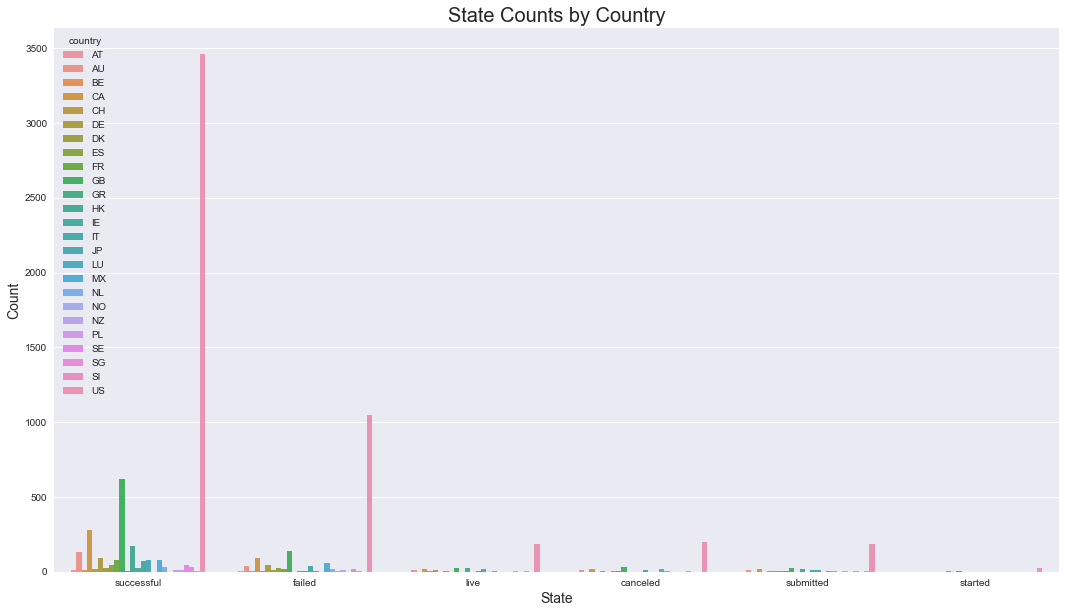

In [7]:
#process the location into onel single string
#training_df["location"]= training_df["location"].apply(lambda x : str(''.join(x)))
training_df["original_currency"] = training_df["original_currency"].apply(lambda x : str(x))

#propress the list features into string
training_df['country'] = training_df['country'].apply(lambda x: str(x))
training_df['category'] = training_df['category'].apply(lambda x: str(x))

# Encode the categorical features as integers
le = LabelEncoder()
#training_df['state'] = le.fit_transform(training_df['state'])
#training_df['country'] = le.fit_transform(training_df['country'])
#training_df['category'] = le.fit_transform(training_df['category'])
#training_df["location"] = le.fit_transform(training_df["location"])
#training_df["original_currency"] = le.fit_transform(training_df["original_currency"])


eda_data = training_df.groupby('country')['state'].value_counts().reset_index(name='count')
sns.barplot(x='state', y='count', hue='country', data=eda_data, capsize=20)

plt.gca().set_title('State Counts by Country', fontsize=20)
plt.gca().set_xlabel('State', fontsize=14)
plt.gca().set_ylabel('Count', fontsize=14)
plt.show()

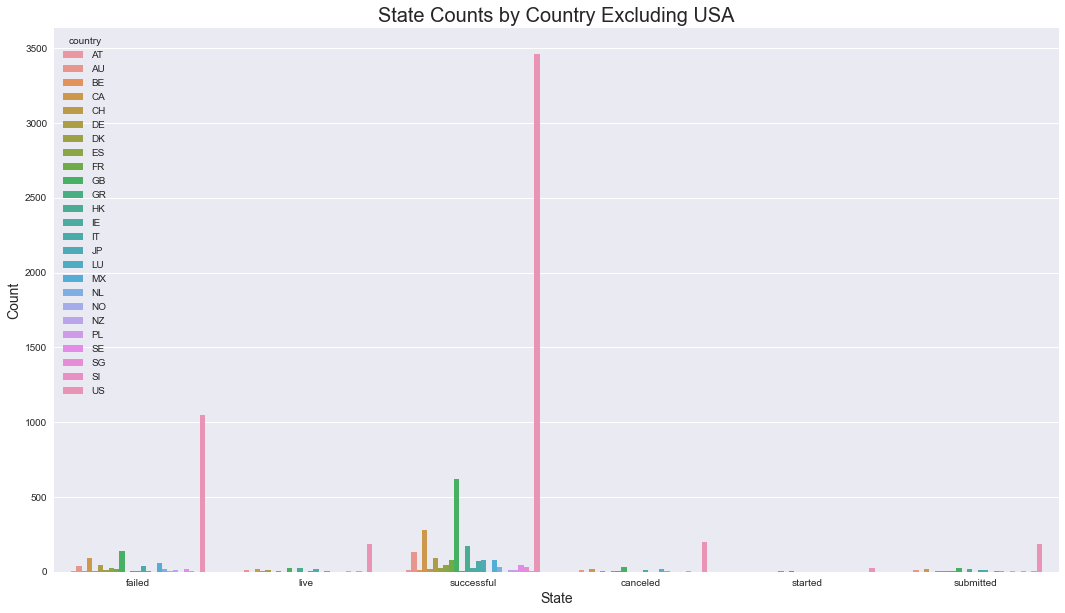

In [8]:
# filter out rows where 'country' is 'us'
filtered_df = training_df[training_df['country']!="['us']"]

# group the filtered data by country and state, and count the occurrences of each state for each country
grouped_df = filtered_df.groupby(['country', 'state']).size().reset_index(name='count')

# plot the state counts for each country separately using a barplot
sns.barplot(x='state', y='count', hue='country', data=grouped_df)

plt.gca().set_title('State Counts by Country Excluding USA', fontsize=20)
plt.gca().set_xlabel('State', fontsize=14)
plt.gca().set_ylabel('Count', fontsize=14)
plt.show()


# Dealing with text data
### Changing to lowercase, remove punctuation, digits, make slug nicer, etc

In [9]:
# Remove '-'
training_df['slug'] = training_df['slug'].apply(lambda x: x.replace("-", " " ))

# lowercase
training_df[['name','blurb','slug', 'country', 'creator', 'location', 'category']] = training_df[['name','blurb','slug', 'country', 'creator', 'location', 'category']].applymap(str.lower)

#Remove Punctation


#You can get this function from our discussion session code. However, we leave it as a blank for a practice.
def remove_punctuation(document):

    no_punct = ''.join([character for character in document if character not in punctuation])
    
    return no_punct

training_df[['name','blurb','slug', 'country', 'creator', 'location', 'category']] = training_df[['name','blurb','slug', 'country', 'creator', 'location', 'category']].applymap(remove_punctuation)

#Remove Digits 

def remove_digit(document): 
    
    no_digit = ''.join([character for character in document if not character.isdigit()])
              
    return no_digit

training_df[['name','blurb','slug', 'country', 'creator', 'location', 'category']] = training_df[['name','blurb','slug', 'country', 'creator', 'location', 'category']].applymap(remove_digit)

training_data = training_df.copy()

### Generating embeddings

In [10]:
# Remove live or cancelled rows
training_data = training_data.drop(training_data[(training_data['state']=='live')|(training_data['state']=='canceled')|(training_data['state']=='submitted')|(training_data['state']=='started')].index, axis =0)

# Remove null values
pd.isnull(training_data).sum()
nans=np.nonzero(list(training_data['usd_pledged'].isnull()))[0]
training_data = training_data.drop(list(nans))

# Remove empty column
training_data = training_data.drop(['is_superbacker'], axis = 1)

# Count vectorization of text

# Blurb data
corpus = training_data['blurb'].values

# Creating the vectorizer
vectorizer = CountVectorizer(stop_words='english')

# Converting the text to numeric data
X = vectorizer.fit_transform(corpus)

#print(vectorizer.get_feature_names())

# Preparing Data frame For machine learning
# Priority column acts as a target variable and other columns as predictors
CountVectorizedData=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
CountVectorizedData['state']=list(training_data['state'])
print(CountVectorizedData.shape)
CountVectorizedData.head()


(6967, 16863)


/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aac,aangevuld,aar,aaron,aarspi,abalone,abandon,abandoned,abandonment,abbandono,...,九岡望によるオリジナルフィギュア,剣舞人,在家享受蔡菜館美食,忘れたくない本のほん,新しい書き味のつけペン,月雨,現代の家族の形について考えた映画,粵語文學期刊,航空機品質の加工技術で作られた,首個為公義發聲嘅廣東話電台
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Generating embedding - change path for where your copy of word2vec is stored


In [11]:


# Using Google's model
GoogleModel = gensim.models.KeyedVectors.load_word2vec_format('/Users/zackbrodtman/Documents/cal/242/GoogleNews-vectors-negative300.bin', binary=True,)
#GoogleModel = gensim.models.KeyedVectors.load_word2vec_format('/Users/mehdibadri/Downloads/GoogleNews-vectors-negative300.bin', binary=True)

# Creating the list of words which are present in the Document term matrix
WordsVocab=CountVectorizedData.drop(['state'], axis =1).columns

# Defining a function which takes text input and returns one vector for each sentence
def FunctionText2Vec(inpTextData):
    # Converting the text to numeric data
    X = vectorizer.transform(inpTextData)
    CountVecData=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names()).drop(['state'], axis = 1)
    
    # Creating empty dataframe to hold sentences
    W2Vec_Data=pd.DataFrame()
    
    # Looping through each row for the data
    for i in range(CountVecData.shape[0]):

        # initiating a sentence with all zeros
        Sentence = np.zeros(300)

        # Looping thru each word in the sentence and if its present in 
        # the Word2Vec model then storing its vector
        for word in WordsVocab[CountVecData.iloc[i , :]>=1]:
            #print(word)
            if word in GoogleModel.key_to_index.keys():    
                Sentence=Sentence+GoogleModel[word]
        # Appending the sentence to the dataframe
        W2Vec_Data= pd.concat([W2Vec_Data, pd.DataFrame([Sentence])], ignore_index=True)
    return(W2Vec_Data)

# Calling the function to convert all the text data to Word2Vec Vectors
W2Vec_Data=FunctionText2Vec(training_data['blurb'])

# Checking the new representation for sentences
W2Vec_Data.shape

/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(6967, 300)

In [12]:
# Adding the target variable
W2Vec_Data.reset_index(inplace=True, drop=True)
W2Vec_Data['state']=CountVectorizedData['state']

# Assigning to DataForML variable
DataForML=W2Vec_Data
DataForML.head()

DataForML['goal_usd'] = list(training_data['goal_usd'])
DataForML['original_currency'] = list(training_data['original_currency'])
DataForML['staff_pick'] = list(training_data['staff_pick'])
DataForML['previous_launcher'] = list(training_data['previous_launcher'])
DataForML['category'] = list(training_data['category'])
DataForML = pd.get_dummies(DataForML, columns=['staff_pick', 'original_currency', 'previous_launcher', 'category'])


In [13]:
# Separate Target Variable and Predictor Variables
TargetVariable=DataForML['state']
Predictors=DataForML.drop(['state'], axis =1)

X=Predictors.values
y=TargetVariable.values

# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4876, 331)
(4876,)
(2091, 331)
(2091,)


# Model Fitting

## Baseline

In [14]:
y_train_binary= (y_train=='successful').astype(int)
y_test_binary = (y_test=='successful').astype(int)

print(y_train_binary.mean())

0.7676374077112387


In [15]:
y_pred_baseline = np.ones(len(y_test_binary)).astype(int)

confusion_mat = confusion_matrix(y_test_binary, y_pred_baseline)

tn , fp , fn , tp = confusion_mat.ravel()
TPR_baseline = tp/(tp+fn)
FPR_baseline = fp/(fp+tn)
ACC_baseline = (tp + tn ) / (tp+tn+fp+fn)
print('confusion matrix')
print(confusion_mat)
print('TPR , FPR , ACC')
print(TPR_baseline,FPR_baseline,ACC_baseline)

confusion matrix
[[   0  486]
 [   0 1605]]
TPR , FPR , ACC
1.0 1.0 0.7675753228120517


## Logistic Regression

In [16]:
# Logistic Regression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=10,penalty='l2', solver='newton-cg')


# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)

# Generating predictions on testing data
prediction=LOG.predict(X_test)
# Printing sample values of prediction in Testing data
TestingData=pd.DataFrame(data=X_test, columns=Predictors.columns)
TestingData['Survived']=y_test
TestingData['Predicted_Survived']=prediction
print(TestingData.head())


# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(prediction, y_test))

## Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))


## Running 10-Fold Cross validation on a given algorithm
## Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: Co

          0         1         2         3         4         5         6   
0  0.887695   0.11731 -0.716431  0.695312  0.082031  0.161743  1.369181  \
1  0.655502   0.19342  0.511963  0.835571 -0.248047 -0.150879  0.062012   
2  0.180176 -0.406128 -0.281555   1.26709  0.077271  0.287109  1.292725   
3  0.964355  2.030945  0.003662   0.62146 -0.482605  0.599365 -0.363586   
4  0.614258  0.632019 -1.073486   1.09314 -0.130249 -0.225952  0.231491   

          7         8         9  ... category_journalismphoto   
0  0.206665  0.981445  0.775513  ...                    False  \
1 -0.898499  0.365723  0.330811  ...                    False   
2 -1.126099  0.766968  0.208984  ...                    False   
3 -1.140961 -0.521484  1.665283  ...                    False   
4  0.289581  0.671387  0.098755  ...                    False   

  category_musicrb category_publishingletterpress   
0            False                          False  \
1            False                          False   

/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478:


Accuracy values for 10-fold Cross Validation:
 [0.74974056 0.79257037 0.74208598 0.81707022 0.82377609 0.79335336
 0.91999197 0.91483357 0.8528303  0.86240469]

Final Average Accuracy of the model: 0.83


## CART

In [17]:
dtc = DecisionTreeClassifier(random_state=42)

dtc.fit(X_train, y_train_binary)

y_pred_dtc = dtc.predict(X_test)

confusion_mat = confusion_matrix(y_test_binary, y_pred_dtc)

tn , fp , fn , tp = confusion_mat.ravel()
TPR_dtc = tp/(tp+fn)
FPR_dtc = fp/(fp+tn)
ACC_dtc = (tp + tn ) / (tp+tn+fp+fn)
print('confusion matrix')
print(confusion_mat)
print('TPR , FPR , ACC')
print(TPR_dtc,FPR_dtc,ACC_dtc)

confusion matrix
[[ 323  163]
 [ 185 1420]]
TPR , FPR , ACC
0.8847352024922118 0.33539094650205764 0.8335724533715926


In [18]:
dtc = DecisionTreeClassifier(criterion = 'gini', max_depth=8, random_state=42)

dtc.fit(X_train, y_train_binary)

y_pred_dtc = dtc.predict(X_test)

confusion_mat = confusion_matrix(y_test_binary, y_pred_dtc)

tn , fp , fn , tp = confusion_mat.ravel()
TPR_dtc = tp/(tp+fn)
FPR_dtc = fp/(fp+tn)
ACC_dtc = (tp + tn ) / (tp+tn+fp+fn)
print('confusion matrix')
print(confusion_mat)
print('TPR , FPR , ACC')
print(TPR_dtc,FPR_dtc,ACC_dtc)

confusion matrix
[[ 320  166]
 [ 153 1452]]
TPR , FPR , ACC
0.9046728971962616 0.34156378600823045 0.8474414155906265


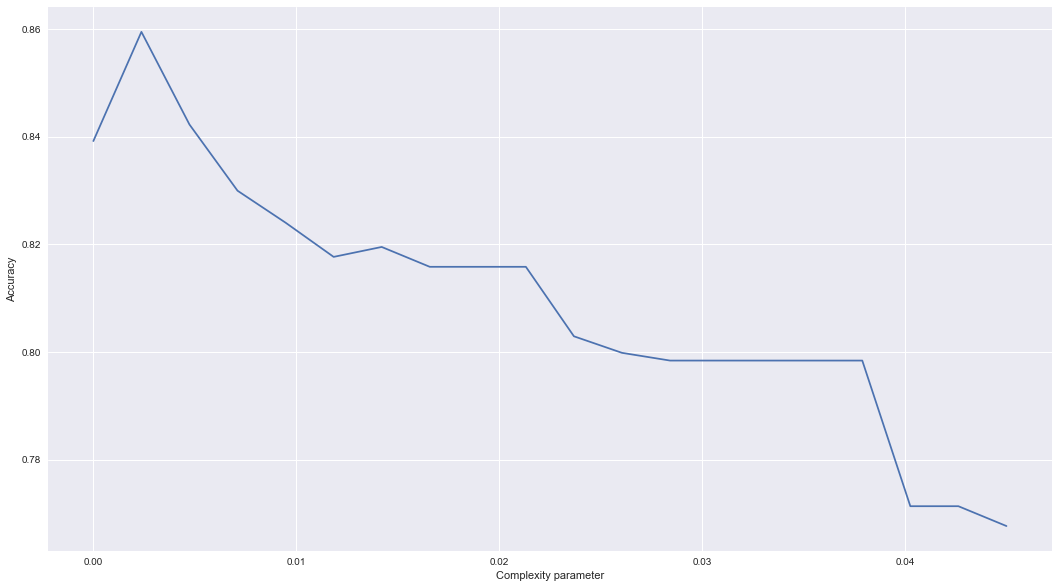

In [19]:
L = []
for cp in np.linspace(0,0.045,20):
    tree_regression = DecisionTreeClassifier(criterion = 'gini', max_depth=8, random_state=42,ccp_alpha=cp)
    L.append([cp,cross_val_score(tree_regression, X_train, y_train, cv=5).mean()])
L=np.array(L)

plt.plot(L[:,0],L[:,1])
plt.xlabel('Complexity parameter')
plt.ylabel('Accuracy')
plt.show()

In [20]:
cp_opt = L[:,0][np.argmax(L[:,1])]

dtc = DecisionTreeClassifier(criterion = 'gini', max_depth=8, random_state=42,ccp_alpha=cp_opt)

dtc.fit(X_train, y_train_binary)

y_pred_dtc = dtc.predict(X_test)

confusion_mat = confusion_matrix(y_test_binary, y_pred_dtc)

tn , fp , fn , tp = confusion_mat.ravel()
TPR_dtc = tp/(tp+fn)
FPR_dtc = fp/(fp+tn)
ACC_dtc = (tp + tn ) / (tp+tn+fp+fn)
print('confusion matrix')
print(confusion_mat)
print('TPR , FPR , ACC')
print(TPR_dtc,FPR_dtc,ACC_dtc)

confusion matrix
[[ 290  196]
 [ 128 1477]]
TPR , FPR , ACC
0.9202492211838006 0.40329218106995884 0.8450502152080345


<AxesSubplot:>

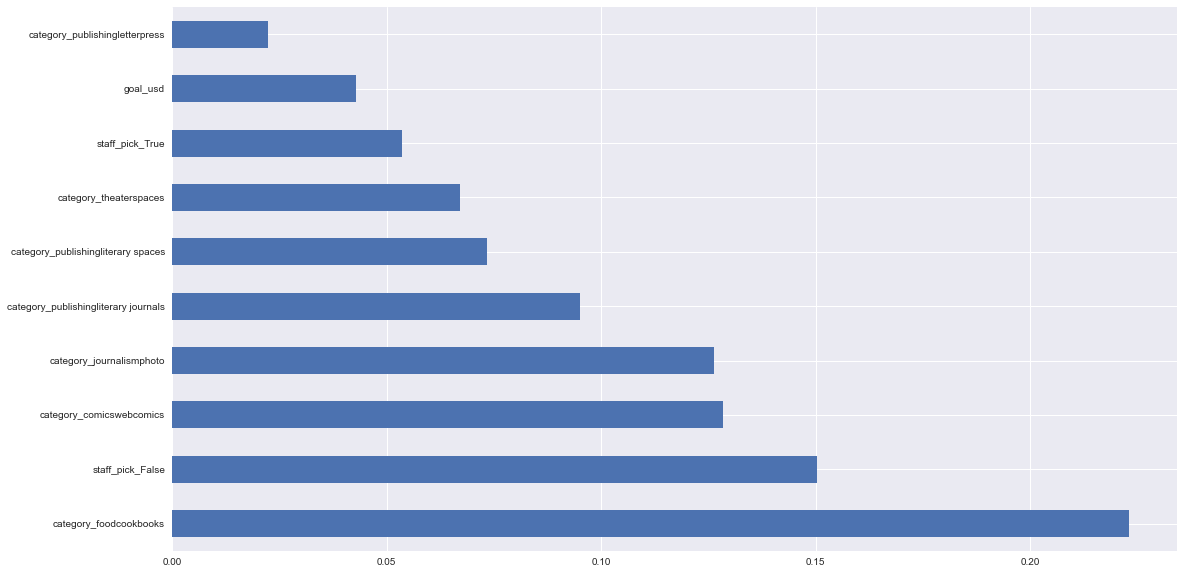

In [21]:
feature_importances = pd.Series(dtc.feature_importances_, index=Predictors.columns)
feature_importances.nlargest(10).plot(kind='barh')

## Random Forest

In [22]:
rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train_binary)

y_pred_rf = rf.predict(X_test)


confusion_mat = confusion_matrix(y_test_binary, y_pred_rf)

tn , fp , fn , tp = confusion_mat.ravel()
TPR_rf = tp/(tp+fn)
FPR_rf = fp/(fp+tn)
ACC_rf = (tp + tn ) / (tp+tn+fp+fn)
print('confusion matrix')
print(confusion_mat)
print('TPR , FPR , ACC')
print(TPR_rf,FPR_rf,ACC_rf)

confusion matrix
[[ 153  333]
 [  58 1547]]
TPR , FPR , ACC
0.9638629283489096 0.6851851851851852 0.8130081300813008


In [23]:
rf = RandomForestClassifier(n_estimators=50,random_state=42,min_samples_split=10)

rf.fit(X_train, y_train_binary)

y_pred_rf = rf.predict(X_test)


confusion_mat = confusion_matrix(y_test_binary, y_pred_rf)

tn , fp , fn , tp = confusion_mat.ravel()
TPR_rf = tp/(tp+fn)
FPR_rf = fp/(fp+tn)
ACC_rf = (tp + tn ) / (tp+tn+fp+fn)
print('confusion matrix')
print(confusion_mat)
print('TPR , FPR , ACC')
print(TPR_rf,FPR_rf,ACC_rf)

confusion matrix
[[ 179  307]
 [  55 1550]]
TPR , FPR , ACC
0.9657320872274143 0.6316872427983539 0.8268770923003348


<AxesSubplot:>

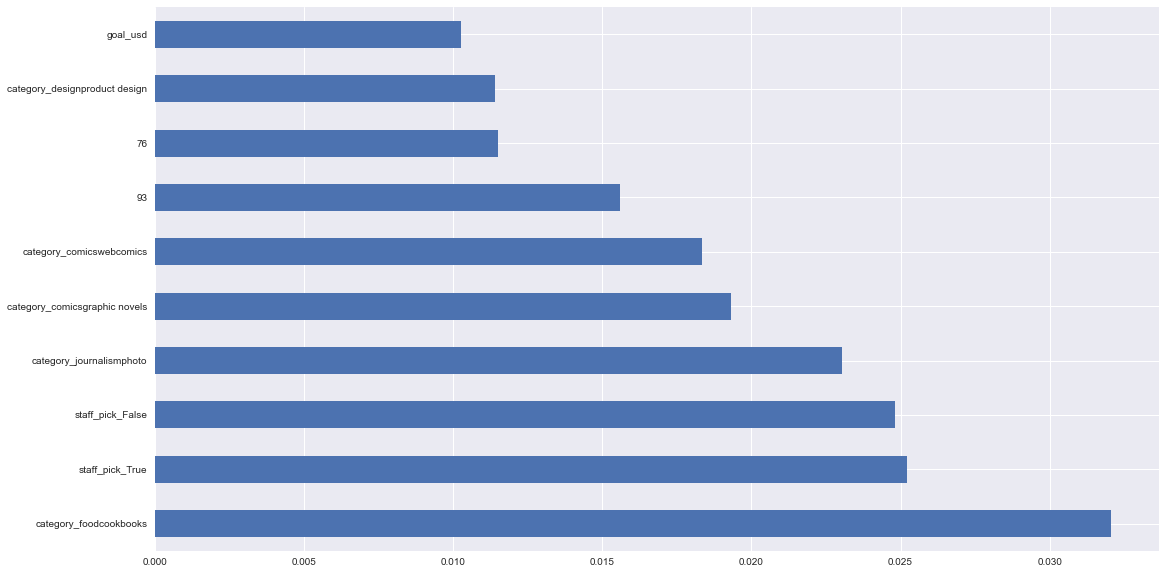

In [24]:
feature_importances = pd.Series(rf.feature_importances_, index=Predictors.columns)
feature_importances.nlargest(10).plot(kind='barh')

## XGBOOST

In [25]:
cl_xgb = xgb.XGBClassifier()

cl_xgb.fit(X_train, y_train_binary)

y_pred = cl_xgb.predict(X_test)

accuracy = accuracy_score(y_test_binary, y_pred)
print('Accuracy: %.2f%%' % (accuracy * 100.0))


Accuracy: 87.76%


In [26]:
cl_xgb = xgb.XGBClassifier(learning_rate=0.054210526315789466,max_depth=8,subsample=0.9,reg_alpha=0.1,reg_lambda=1)


cl_xgb.fit(X_train, y_train_binary)

y_pred_xgb = cl_xgb.predict(X_test)

accuracy = accuracy_score(y_test_binary, y_pred_xgb)
print('Accuracy: %.2f%%' % (accuracy * 100.0))

Accuracy: 88.14%


In [27]:
print(metrics.classification_report(y_test_binary, y_pred_xgb))
print(metrics.confusion_matrix(y_test_binary, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       486
           1       0.92      0.93      0.92      1605

    accuracy                           0.88      2091
   macro avg       0.84      0.83      0.83      2091
weighted avg       0.88      0.88      0.88      2091

[[ 350  136]
 [ 112 1493]]


In [28]:
confusion_mat = confusion_matrix(y_test_binary, y_pred_xgb)

tn , fp , fn , tp = confusion_mat.ravel()
TPR_xgb = tp/(tp+fn)
FPR_xgb = fp/(fp+tn)
ACC_xgb = (tp + tn ) / (tp+tn+fp+fn)
print('confusion matrix')
print(confusion_mat)
print('TPR , FPR , ACC')
print(TPR_xgb,FPR_xgb,ACC_xgb)

confusion matrix
[[ 350  136]
 [ 112 1493]]
TPR , FPR , ACC
0.9302180685358256 0.27983539094650206 0.8813964610234337


<AxesSubplot:>

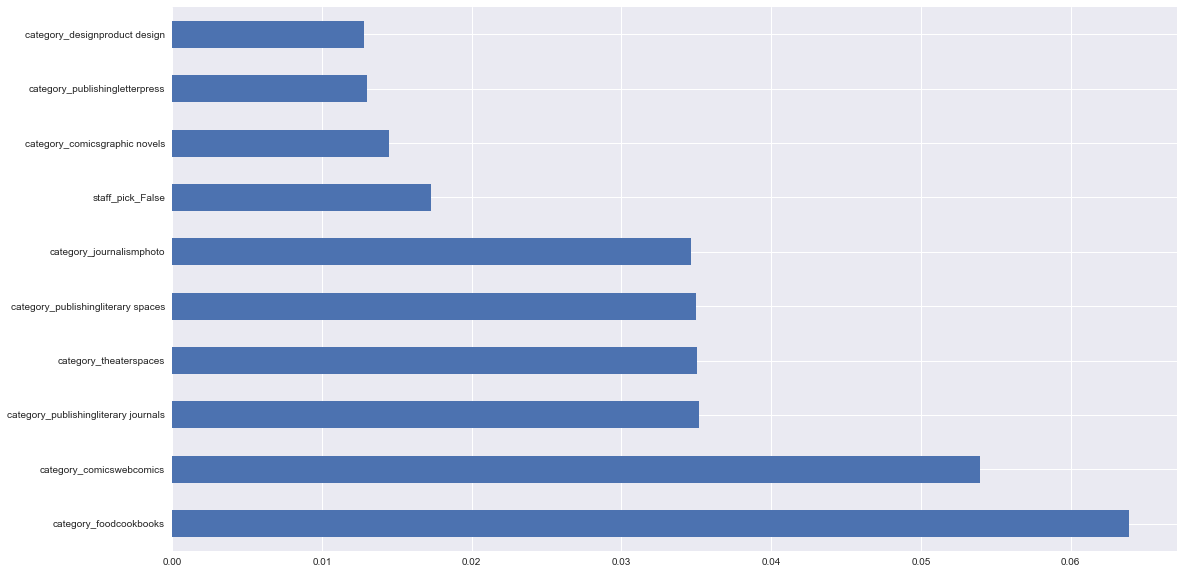

In [29]:
feature_importances = pd.Series(cl_xgb.feature_importances_, index=Predictors.columns)
feature_importances.nlargest(10).plot(kind='barh')

## Comparison

In [30]:
table = pd.DataFrame(columns = ['Accuracy','TPR','FPR'],index = ['Baseline','Decision Tree Classifier','Random Forest','XGBoost'])
table['Accuracy'] = [ACC_baseline,ACC_dtc,ACC_rf,ACC_xgb]
table['TPR'] = [TPR_baseline,TPR_dtc,TPR_rf,TPR_xgb]
table['FPR'] = [FPR_baseline,FPR_dtc,FPR_rf,FPR_xgb]
table

,Accuracy,TPR,FPR
Baseline,0.767575,1.000000,1.000000
Decision Tree Classifier,0.845050,0.920249,0.403292
Random Forest,0.826877,0.965732,0.631687
XGBoost,0.881396,0.930218,0.279835


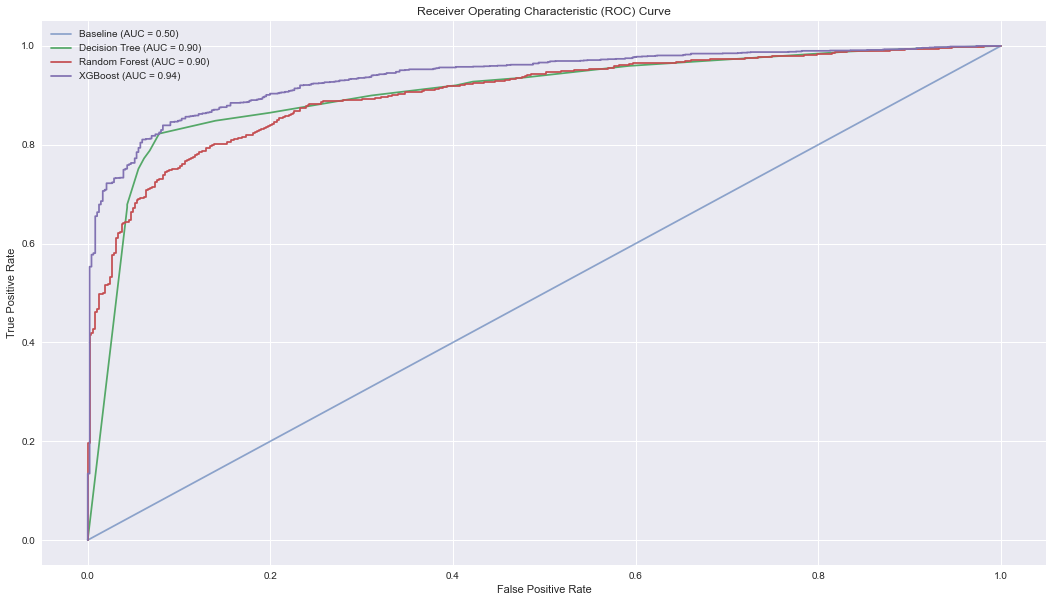

In [31]:
dt_probs = dtc.predict_proba(X_test)[:, 1]
rf_probs = rf.predict_proba(X_test)[:, 1]
xgb_probs = cl_xgb.predict_proba(X_test)[:, 1]
baseline_probs = np.ones(len(y_test))

dt_fpr, dt_tpr, _ = roc_curve(y_test_binary, dt_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test_binary, rf_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test_binary, xgb_probs)
baseline_fpr, baseline_tpr, _ = roc_curve(y_test_binary, baseline_probs)

dt_auc = auc(dt_fpr, dt_tpr)
rf_auc = auc(rf_fpr, rf_tpr)
xgb_auc = auc(xgb_fpr, xgb_tpr)
baseline_auc = auc(baseline_fpr, baseline_tpr)

# Plot the ROC curve for each model in the same plot
plt.plot(baseline_fpr, baseline_tpr, label='Baseline (AUC = {:.2f})'.format(baseline_auc),alpha=0.6)
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (AUC = {:.2f})'.format(dt_auc))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(rf_auc))
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost (AUC = {:.2f})'.format(xgb_auc))

# Set the plot title and axis labels
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show the legend and plot
plt.legend()
plt.show()